### Етап 3. Тестування та дослідження ефективності

In [15]:
import os
import time
import matplotlib.pyplot as plt
from algorithms.LZ77 import LZ77
from algorithms.LZ78 import LZ78Compressor
from algorithms.LZW import LZWCompressor
from algorithms.RLE import RLECompressor
from algorithms.huffman_coding import HuffmanTree

### Формат - txt, семпл - "Місто" В. Підмогильний

початковий розмір файлу

In [18]:
misto_size = os.stat('./test/pidmohylnyy-valerian-petrovych-misto76.txt').st_size
print(f'Початковий розмір файлу: {misto_size} KB')

Початковий розмір файлу: 911282 KB


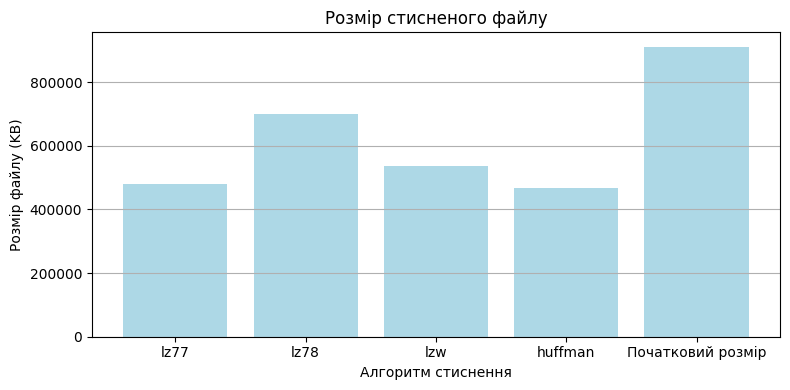

In [ ]:
def test_size_compression(name: str, filename: str): 
    algorithms = {"huffman": HuffmanTree(),
                  "lz77": LZ77(),
                  "lz78": LZ78Compressor(),
                  "lzw": LZWCompressor(),
                  "rle": RLECompressor()}
    
    if name in algorithms:
        compression_time_start = time.time()
        algorithms[name].compress_file(filename)
        compression_time_end = time.time()
        compression_size = os.stat(f'./compressed_{name}.bin').st_size

    return compression_size, f'{compression_time_end - compression_time_start: .2f}'

size_compression = {}
algorithms = ["lz77", "lz78", "lzw", "huffman"]
for algorithm in algorithms:
    size_compression[algorithm] = test_size_compression(algorithm, './test/pidmohylnyy-valerian-petrovych-misto76.txt')

sizes = [alg[0] for alg in list(size_compression.values())]
algorithms.append("Початковий розмір")
sizes.append(misto_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.xlabel("Алгоритм стиснення")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

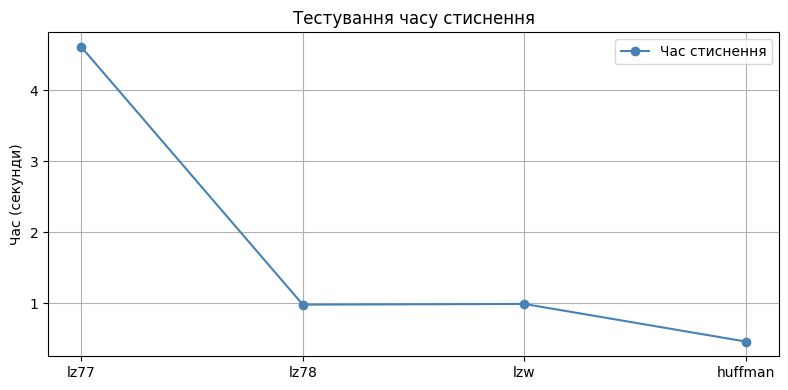

In [51]:
times = [float(alg[1].strip()) for alg in list(size_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_misto = huffman.compress_file('./test/pidmohylnyy-valerian-petrovych-misto76.txt')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_misto_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_misto_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')

Розмір після стиснення алгоритмом Гаффмана: 468496 KB
Час стиснення алгоритмом Гаффмана: 0.09 секунд
Час декомпресування алгоритмом Гаффмана: 0.32 секунд


### Формат - txt, семпл - "Holy Bible"

початковий розмір файлу

In [40]:
bible_size = os.stat('./test/CSB_Pew_Bible_2nd_Printing.txt').st_size
print(f'Початковий розмір файлу: {bible_size} KB')

Початковий розмір файлу: 5705523 KB


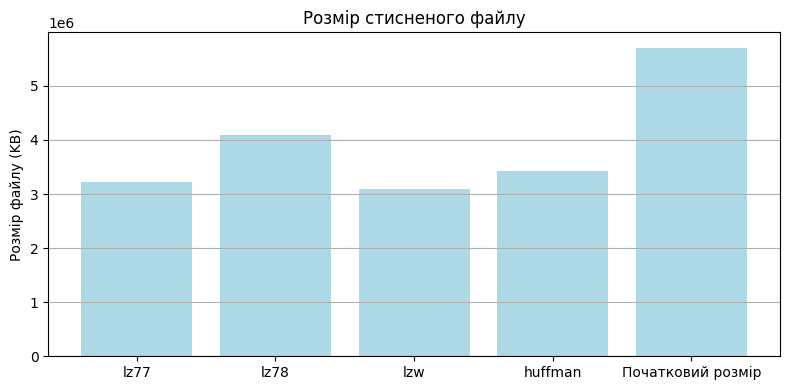

In [54]:
size_compression_b = {}
algorithms = ["lz77", "lz78", "lzw", "huffman"]
for algorithm in algorithms:
    size_compression_b[algorithm] = test_size_compression(algorithm, './test/CSB_Pew_Bible_2nd_Printing.txt')

sizes_b = [alg[0] for alg in list(size_compression_b.values())]
algorithms.append("Початковий розмір")
sizes_b.append(bible_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_b, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[4.61, 0.98, 0.99, 0.45]


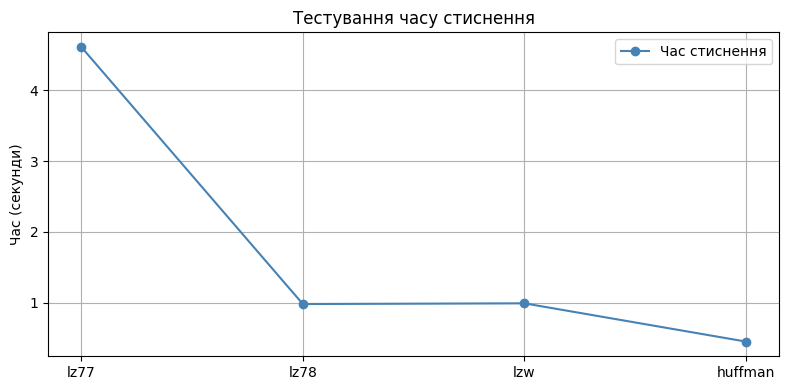

In [ ]:
times_b = [float(alg[1].strip()) for alg in list(size_compression_b.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_b, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - json, семпл - large-json.file, 11352 рядків

початковий розмір файлу

In [58]:
json_size = os.stat('./test/large-file.json').st_size
print(f'Початковий розмір файлу: {json_size} KB')

Початковий розмір файлу: 26141343 KB


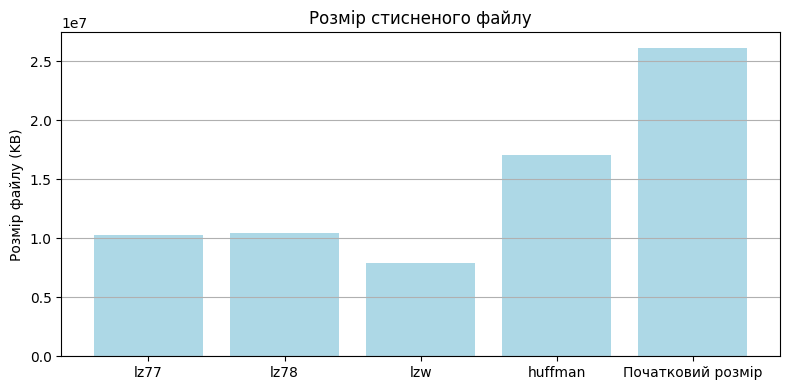

In [ ]:
size_compression_j = {}
algorithms = ["lz77", "lz78", "lzw", "huffman"]
for algorithm in algorithms:
    size_compression_j[algorithm] = test_size_compression(algorithm, './test/large-file.json')

sizes_j = [alg[0] for alg in list(size_compression_c=j.values())]
algorithms.append("Початковий розмір")
sizes_j.append(json_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_j, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

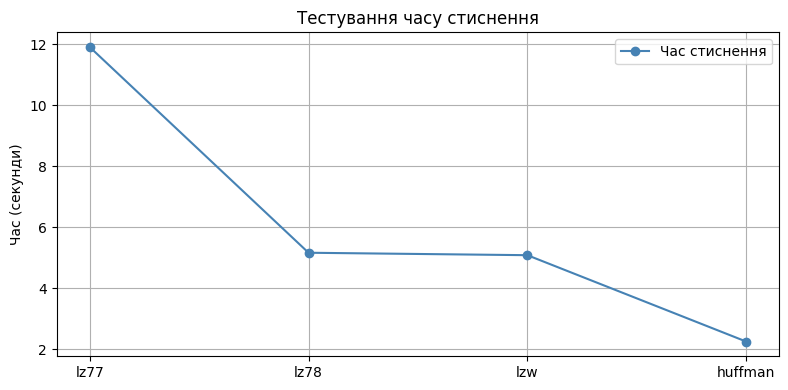

In [ ]:
times_j = [float(alg[1].strip()) for alg in list(size_compression_j.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_j, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - csv, семпл - 100000 рядків

початковий розмір файлу

In [63]:
csv_size = os.stat('./test/customers-100000.csv').st_size
print(f'Початковий розмір файлу: {csv_size} KB')

Початковий розмір файлу: 17317579 KB


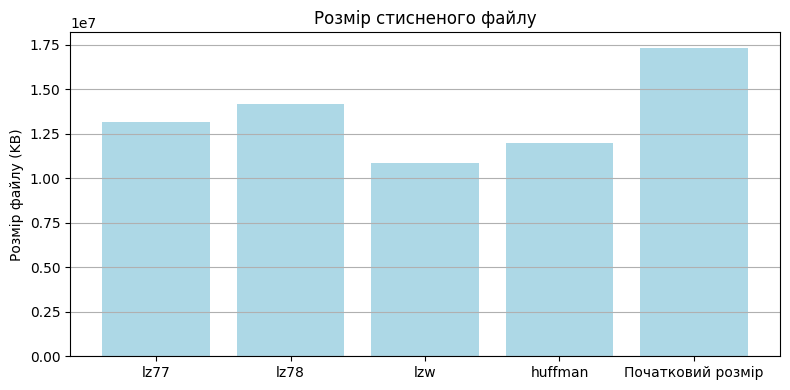

In [64]:
size_compression_c = {}
algorithms = ["lz77", "lz78", "lzw", "huffman"]
for algorithm in algorithms:
    size_compression_c[algorithm] = test_size_compression(algorithm, './test/customers-100000.csv')

sizes_c = [alg[0] for alg in list(size_compression_c.values())]
algorithms.append("Початковий розмір")
sizes_c.append(csv_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_c, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

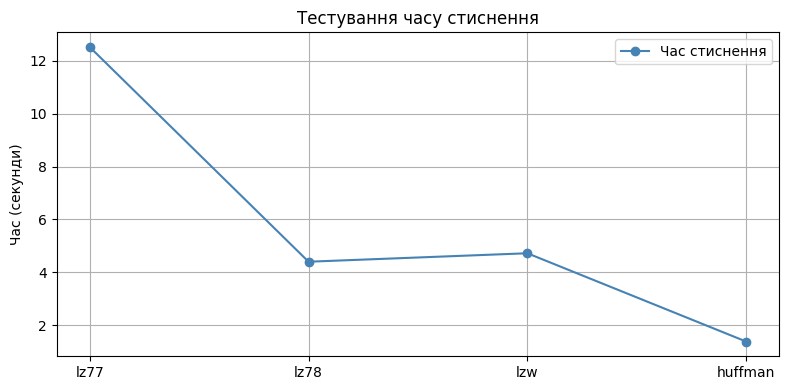

In [65]:
times_c = [float(alg[1].strip()) for alg in list(size_compression_c.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_c, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - bmp

початковий розмір файлу

In [79]:
bmp_size = os.stat('./test/img.bmp').st_size
print(f'Початковий розмір файлу: {bmp_size} KB')

Початковий розмір файлу: 551596 KB


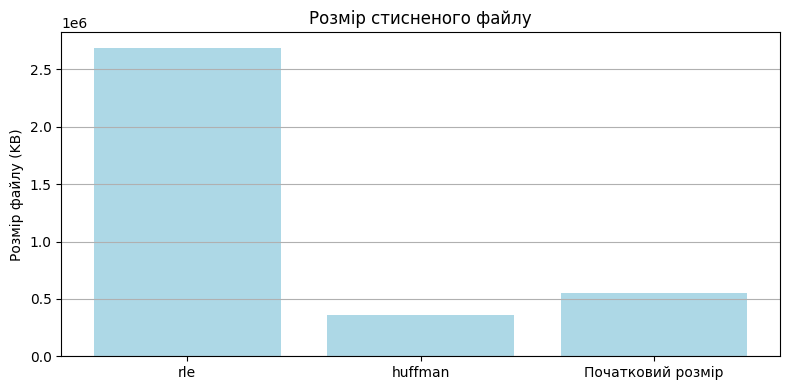

In [80]:
size_compression_bmp = {}
algorithms = ["rle", "huffman"]
for algorithm in algorithms:
    size_compression_bmp[algorithm] = test_size_compression(algorithm, './test/img.bmp')

sizes_bmp = [alg[0] for alg in list(size_compression_bmp.values())]
algorithms.append("Початковий розмір")
sizes_bmp.append(bmp_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_bmp, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

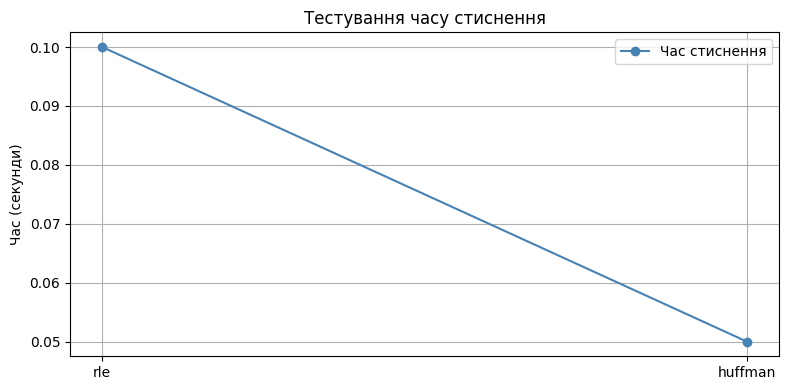

In [82]:
times_bmp = [float(alg[1].strip()) for alg in list(size_compression_bmp.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_bmp, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - jpeg

початковий розмір файлу

In [68]:
jpeg_size = os.stat('./test/SampleJPGImage_20mbmb.jpg').st_size
print(f'Початковий розмір файлу: {jpeg_size} KB')

Початковий розмір файлу: 21348301 KB


Після стиснення алгоритмом Гаффмана

In [69]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_jpg = huffman.compress_file('./test/SampleJPGImage_20mbmb.jpg')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_jpg_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_jpg_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')

Розмір після стиснення алгоритмом Гаффмана: 21258491 KB
Час стиснення алгоритмом Гаффмана: 2.12 секунд
Час декомпресування алгоритмом Гаффмана: 11.16 секунд


### Формат - png

початковий розмір файлу

In [70]:
png_size = os.stat('./test/SamplePNGImage_10mbmb.png').st_size
print(f'Початковий розмір файлу: {png_size} KB')

Початковий розмір файлу: 10473459 KB


Після стиснення алгоритмом Гаффмана

In [71]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_png = huffman.compress_file('./test/SamplePNGImage_10mbmb.png')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_png_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_png_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')

Розмір після стиснення алгоритмом Гаффмана: 10459793 KB
Час стиснення алгоритмом Гаффмана: 1.02 секунд
Час декомпресування алгоритмом Гаффмана: 5.39 секунд


Після стиснення RLE

In [72]:
rle = RLECompressor()

start_rle_compression = time.time()
rle_png = rle.compress_file('./test/SamplePNGImage_10mbmb.png')
end_rle_compression = time.time()

rle_png_size = os.stat('compressed_rle.bin').st_size
print(f'Розмір після стиснення алгоритмом RLE: {rle_png_size} KB')
print(f'Час стиснення алгоритмом RLE: {end_rle_compression - start_rle_compression:.2f} секунд')

Розмір після стиснення алгоритмом RLE: 52099685 KB
Час стиснення алгоритмом RLE: 1.62 секунд


### Формат - flac

початковий розмір файлу

In [73]:
flac_size = os.stat('./test/sample2.flac').st_size
print(f'Початковий розмір файлу: {flac_size} KB')

Початковий розмір файлу: 22990117 KB


Після стиснення алгоритмом Гаффмана

In [74]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_flac = huffman.compress_file('./test/sample2.flac')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_flac_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_flac_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')

Розмір після стиснення алгоритмом Гаффмана: 22990117 KB
Час стиснення алгоритмом Гаффмана: 2.23 секунд
Час декомпресування алгоритмом Гаффмана: 12.29 секунд


### Формат - wav

початковий розмір файлу

In [75]:
wav_size = os.stat('./test/Ouch-1.wav').st_size
print(f'Початковий розмір файлу: {wav_size} KB')

Початковий розмір файлу: 25784 KB


Після стиснення алгоритмом Гаффмана

In [76]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_flac = huffman.compress_file('./test/Ouch-1.wav')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_flac_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_flac_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')

Розмір після стиснення алгоритмом Гаффмана: 22336 KB
Час стиснення алгоритмом Гаффмана: 0.01 секунд
Час декомпресування алгоритмом Гаффмана: 0.01 секунд
